In [1]:
#!/usr/bin/env python
# coding: utf-8

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
import sys
sys.path.insert(0, './libraries')
from DataGenerator import DataGenerator
import tensorflow as tf
from Speckle2Void import Speckle2V

from IPython.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

%reload_ext autoreload
%autoreload 2


## Instantiate the model

In [38]:
tf.reset_default_graph()
batch_size=16

dir_train = "../DataSet_SAR/TerraSAR_X/HDF5_SLC_DECORRELATED_2/"
dir_test = "../DataSet_SAR/TerraSAR_X/HDF5_SLC_TEST_DECORRELATED_2/"

file_checkpoint = 's2v_checkpoint/model.ckpt-299999'#None for the latest checkpoint

model = Speckle2V(dir_train,
                  dir_test,
                  file_checkpoint,
                  batch_size=batch_size,
                  patch_size=64,
                  model_name='speckle2void',
                  lr=1e-04, 
                  steps_per_epoch=2000,
                  k_penalty_tv=5e-05,
                  shift_list=[3,1],
                  prob = [0.9,0.1],
                  clip=500000,
                  norm=100000,
                  L_noise=1)    

## Build the inference computational graph and load the network

In [39]:
model.build_inference()
model.load_weights()

Taking the specified checkpoint...


## Speckle2Void Prediction

In [45]:
dir_test = "./test_examples/"
datagen = DataGenerator()
imgs = datagen.load_imgs_from_directory(directory = dir_test,filter='decorr*.mat',max_files=None)

Reading ./test_examples/decorr_complex_tsx_SLC_0.mat...


In [46]:
imgs = [img[:,0:1000,0:1000,:] for img in imgs]

In [47]:
cleaned_img= model.predict(imgs[0])

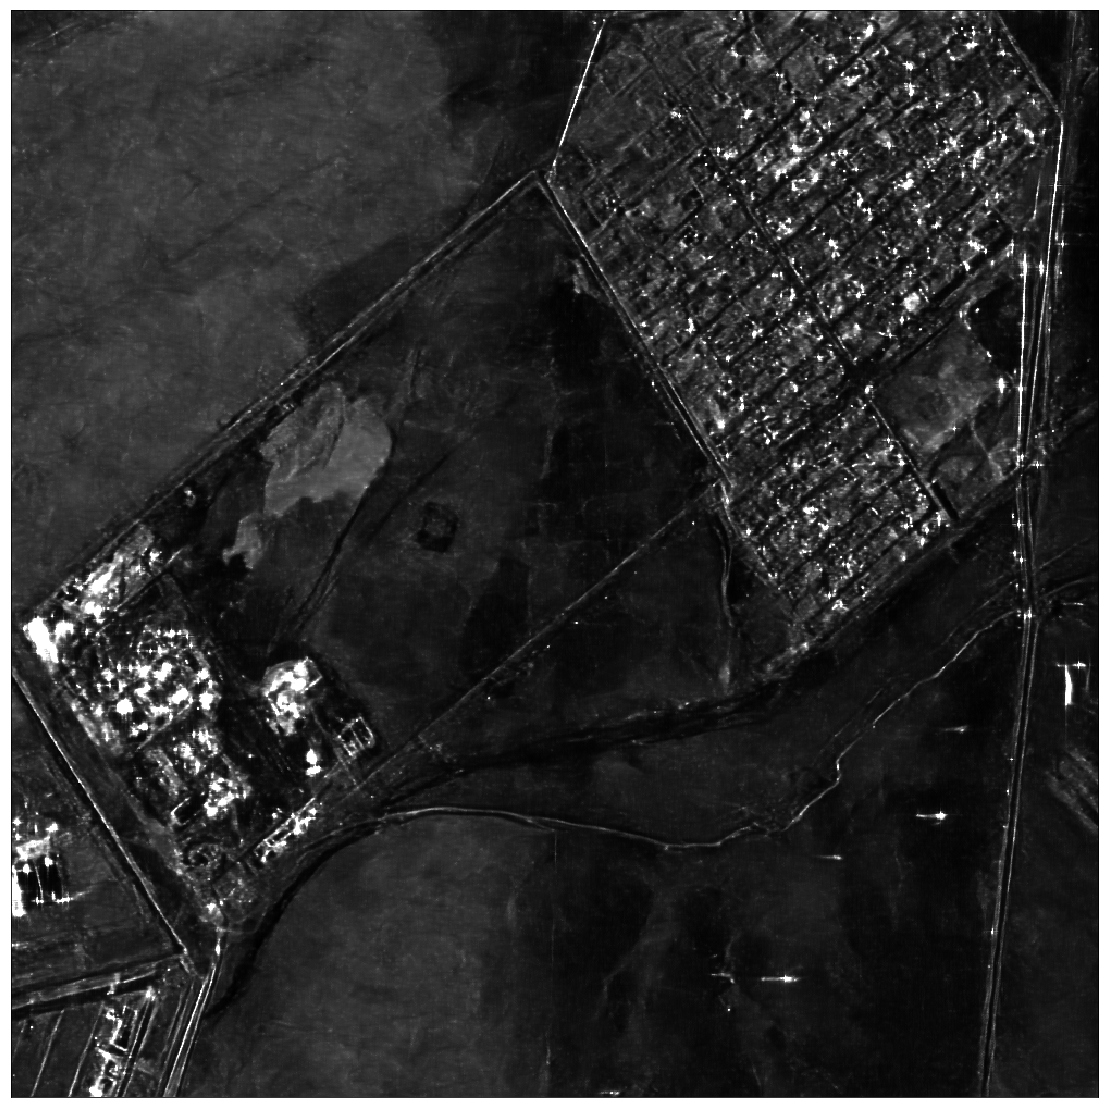

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,20])
plt.imshow(cleaned_img[0,:,:,0] ,cmap = 'gray', interpolation = 'none',vmax=50000)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## Save image to png

In [68]:
plt.imsave('test1',cleaned_img[0,:,:,0] , cmap='gray', vmin=0,vmax=50000)